Logistic Regression

Uploading the Data Set

In [ ]:
import pandas as pd

df = pd.read_csv('/content/student_depression_dataset.csv')
display(df.head())

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


Check Is there any null or missing values

In [ ]:
display(df.isnull().sum())

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
df = df.drop('City', axis=1)
display(df.head())

,id,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Student,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Student,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Student,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Student,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Student,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


Outlier Removal

In [ ]:
# Identify numerical columns to remove outliers from (excluding 'id' and the target 'Depression')
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'id' in numerical_cols:
    numerical_cols.remove('id')
if 'Depression' in numerical_cols:
    numerical_cols.remove('Depression')

print("Numerical columns for outlier removal:", numerical_cols)

Numerical columns for outlier removal: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours']


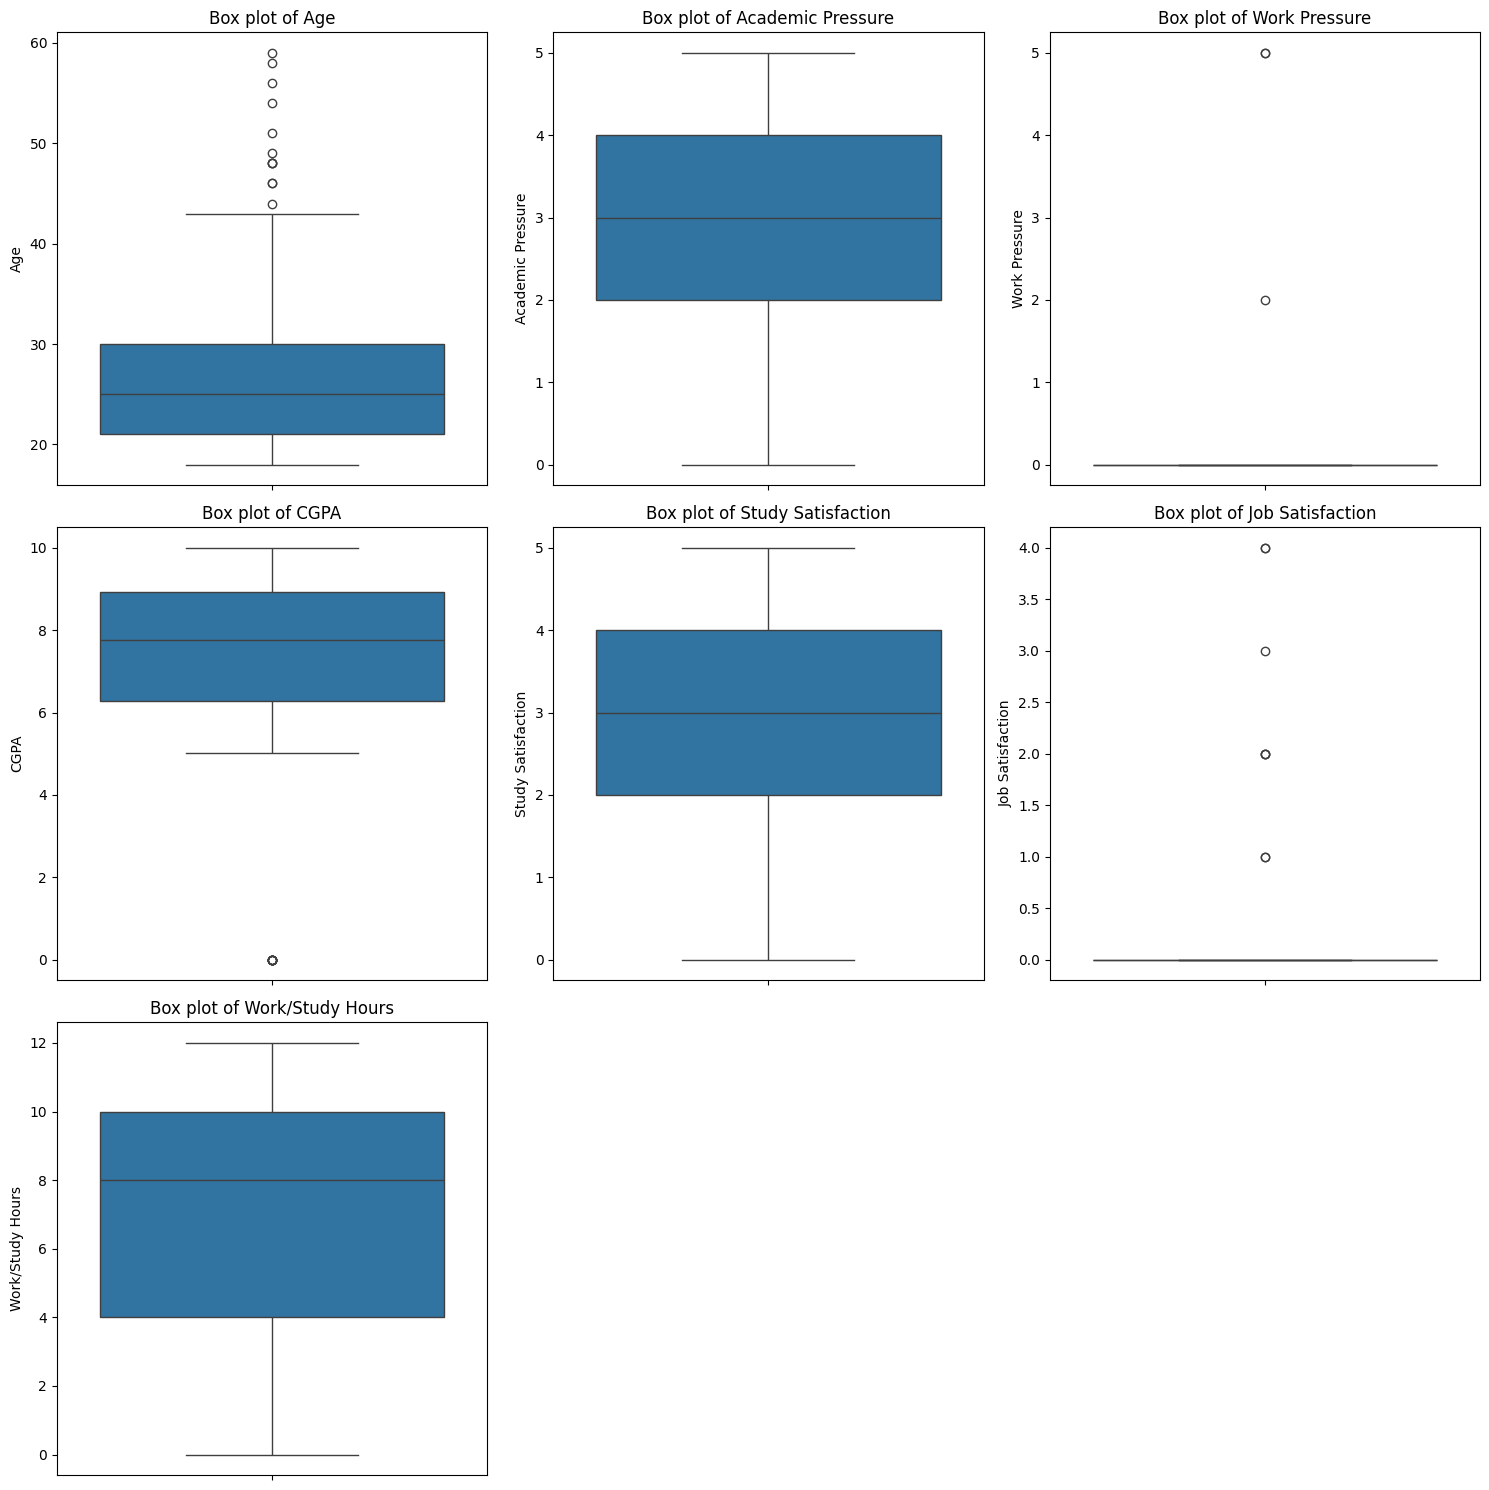

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Determine the number of rows and columns for the subplot grid
n_cols = len(numerical_cols)
n_rows = math.ceil(n_cols / 3) # Assuming a maximum of 3 columns per row

# Plot box plots for numerical columns before outlier removal
plt.figure(figsize=(15, n_rows * 5)) # Adjust figure size based on number of rows
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

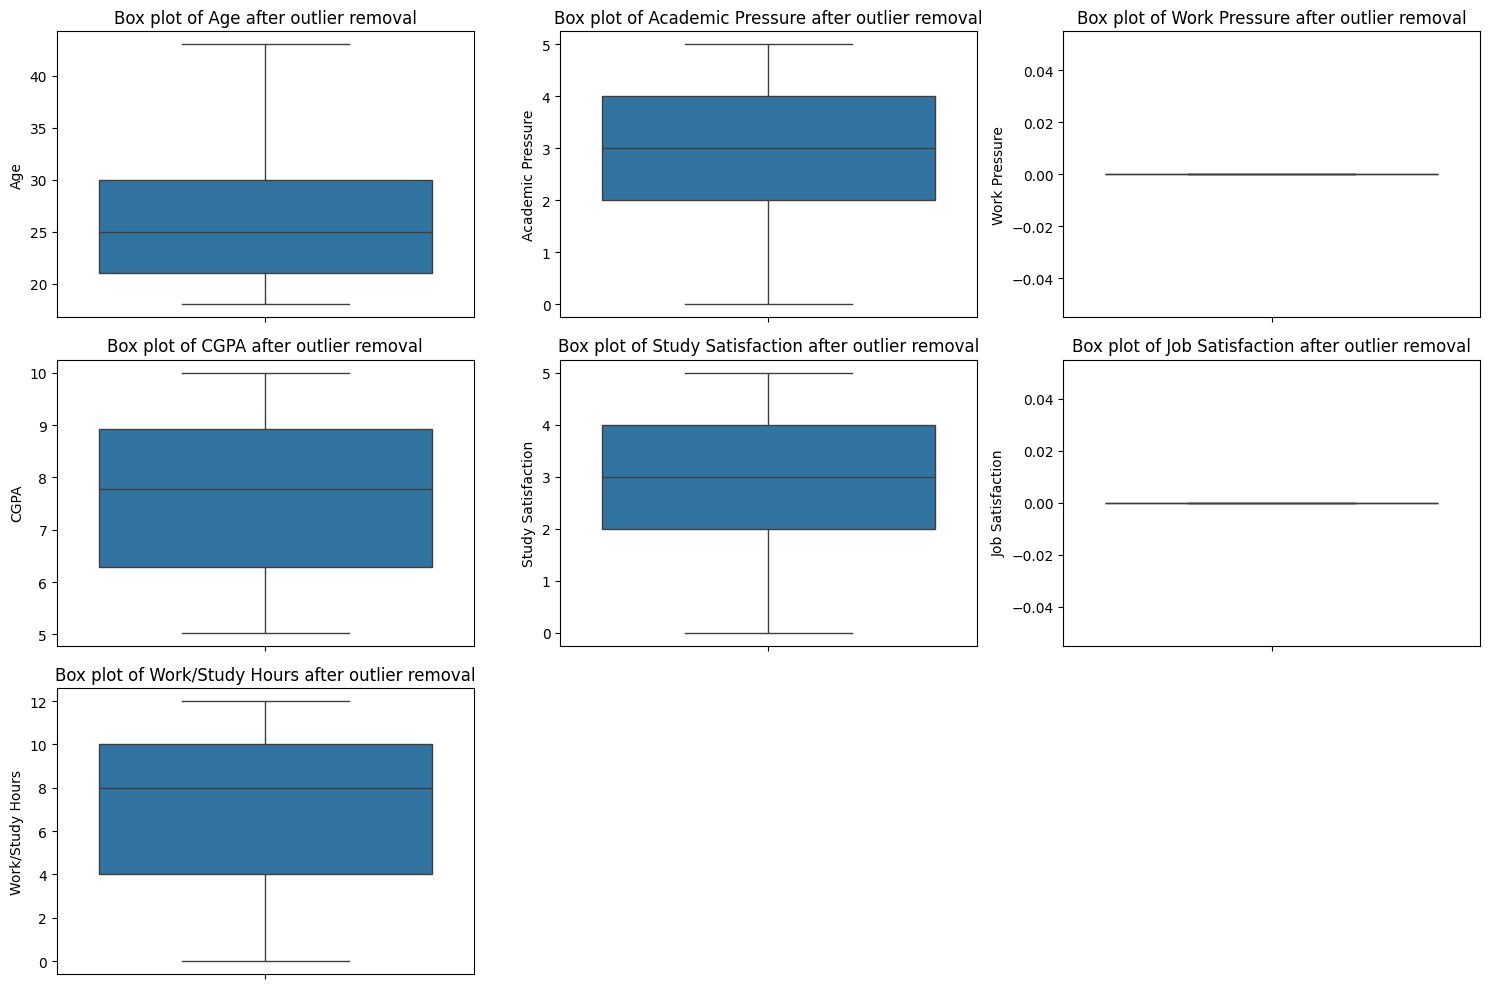

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plots for numerical columns after outlier removal
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_filtered[col])
    plt.title(f'Box plot of {col} after outlier removal')
plt.tight_layout()
plt.show()

In [ ]:
df_filtered = df.copy()
for col in numerical_cols:
    df_filtered = remove_outliers_iqr(df_filtered, col)

print("Shape of DataFrame before outlier removal:", df.shape)
print("Shape of DataFrame after outlier removal:", df_filtered.shape)

Shape of DataFrame before outlier removal: (27901, 18)
Shape of DataFrame after outlier removal: (27878, 18)


In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression,Gender_Male,...,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Financial Stress_2,Financial Stress_3,Financial Stress_4,Financial Stress_5,Financial Stress_?,Family History of Mental Illness_Yes
0,2,33,5,0,8.97,2,0,3,1,True,...,False,False,False,True,False,False,False,False,False,False
1,8,24,2,0,5.90,5,0,3,0,False,...,False,False,False,False,True,False,False,False,False,True
2,26,31,3,0,7.03,5,0,9,0,True,...,False,False,False,False,False,False,False,False,False,True
3,30,28,3,0,5.59,2,0,4,1,False,...,False,False,False,True,False,False,False,True,False,True
4,32,25,4,0,8.13,3,0,1,0,False,...,False,False,False,True,False,False,False,False,False,False


Encording Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns excluding the target variable 'Depression'
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'Depression' in categorical_cols:
    categorical_cols.remove('Depression')

# Apply Label Encoding to the selected categorical columns
df_label_encoded = df.copy()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])
    label_encoders[col] = le

display(df_label_encoded.head())

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33,51,12,5,0,8.97,2,0,0,0,4,1,3,0,0,1
1,8,0,24,5,12,2,0,5.90,5,0,0,1,11,0,3,1,1,0
2,26,1,31,44,12,3,0,7.03,5,0,2,0,6,0,9,0,1,0
3,30,0,28,49,12,3,0,5.59,2,0,1,1,8,1,4,4,1,1
4,32,0,25,18,12,4,0,8.13,3,0,0,1,17,1,1,0,0,0


Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale (excluding 'id' and the target 'Depression')
numerical_cols = df_label_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'id' in numerical_cols:
    numerical_cols.remove('id')
if 'Depression' in numerical_cols:
    numerical_cols.remove('Depression')

# Apply StandardScaler to the selected numerical columns
scaler = StandardScaler()
df_scaled = df_label_encoded.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

display(df_scaled.head())

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,0.891416,1.463165,1.535530,0.02642,1.345543,-0.009777,0.893393,-0.693425,-0.01534,-1.421696,-1.182363,-0.594731,0.761745,-1.121213,-1.488765,-0.968421,1
1,8,-1.121811,-0.371474,-1.434295,0.02642,-0.826104,-0.009777,-1.194076,1.510636,-0.01534,-1.421696,-0.375705,0.246705,-1.312775,-1.121213,-0.793137,1.032609,0
2,26,0.891416,1.055467,1.083600,0.02642,-0.102222,-0.009777,-0.425724,1.510636,-0.01534,0.459582,-1.182363,-0.354321,-1.312775,0.497095,-1.488765,1.032609,0
3,30,-1.121811,0.443921,1.406408,0.02642,-0.102222,-0.009777,-1.404862,-0.693425,-0.01534,-0.481057,-0.375705,-0.113911,0.761745,-0.851495,1.293747,1.032609,1
4,32,-1.121811,-0.167625,-0.594997,0.02642,0.621660,-0.009777,0.322229,0.041262,-0.01534,-1.421696,-0.375705,0.967935,0.761745,-1.660650,-1.488765,-0.968421,0


In [ ]:
# Assuming you want to drop from the scaled dataframe
df_processed = df_scaled.drop(['id', 'City'], axis=1)
display(df_processed.head())

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0.891416,1.463165,0.02642,1.345543,-0.009777,0.893393,-0.693425,-0.01534,-1.421696,-1.182363,-0.594731,0.761745,-1.121213,-1.488765,-0.968421,1
1,-1.121811,-0.371474,0.02642,-0.826104,-0.009777,-1.194076,1.510636,-0.01534,-1.421696,-0.375705,0.246705,-1.312775,-1.121213,-0.793137,1.032609,0
2,0.891416,1.055467,0.02642,-0.102222,-0.009777,-0.425724,1.510636,-0.01534,0.459582,-1.182363,-0.354321,-1.312775,0.497095,-1.488765,1.032609,0
3,-1.121811,0.443921,0.02642,-0.102222,-0.009777,-1.404862,-0.693425,-0.01534,-0.481057,-0.375705,-0.113911,0.761745,-0.851495,1.293747,1.032609,1
4,-1.121811,-0.167625,0.02642,0.621660,-0.009777,0.322229,0.041262,-0.01534,-1.421696,-0.375705,0.967935,0.761745,-1.660650,-1.488765,-0.968421,0


Spilt data set

80 %  For traing data
20 %  Fror testing data

In [ ]:
from sklearn.model_selection import train_test_split

X = df_processed.drop('Depression', axis=1)
y = df_processed['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (22320, 15)
Shape of X_test: (5581, 15)
Shape of y_train: (22320,)
Shape of y_test: (5581,)


Data Set balenceness before Oversampling  using SMOTE

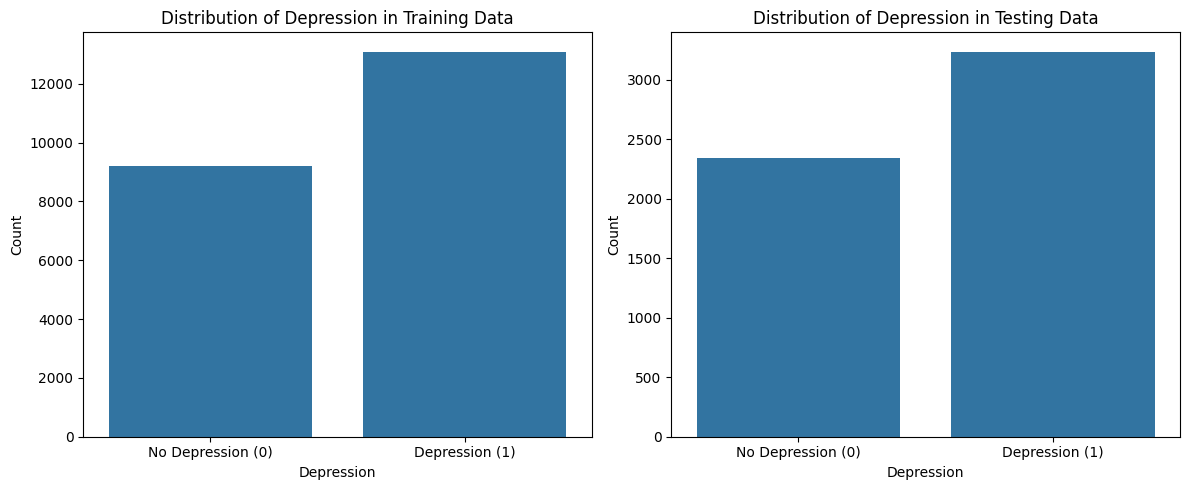

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get value counts for training and testing target variables
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

# Create subplots for the two bar graphs
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot bar graph for training data
sns.barplot(x=train_counts.index, y=train_counts.values, ax=axes[0])
axes[0].set_title('Distribution of Depression in Training Data')
axes[0].set_xlabel('Depression')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Depression (0)', 'Depression (1)'])

# Plot bar graph for testing data
sns.barplot(x=test_counts.index, y=test_counts.values, ax=axes[1])
axes[1].set_title('Distribution of Depression in Testing Data')
axes[1].set_xlabel('Depression')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Depression (0)', 'Depression (1)'])

plt.tight_layout()
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

Shape of X_train_resampled: (26196, 15)
Shape of y_train_resampled: (26196,)


In [ ]:
Over Sampling -only the train data set for reduce Model oferfitting

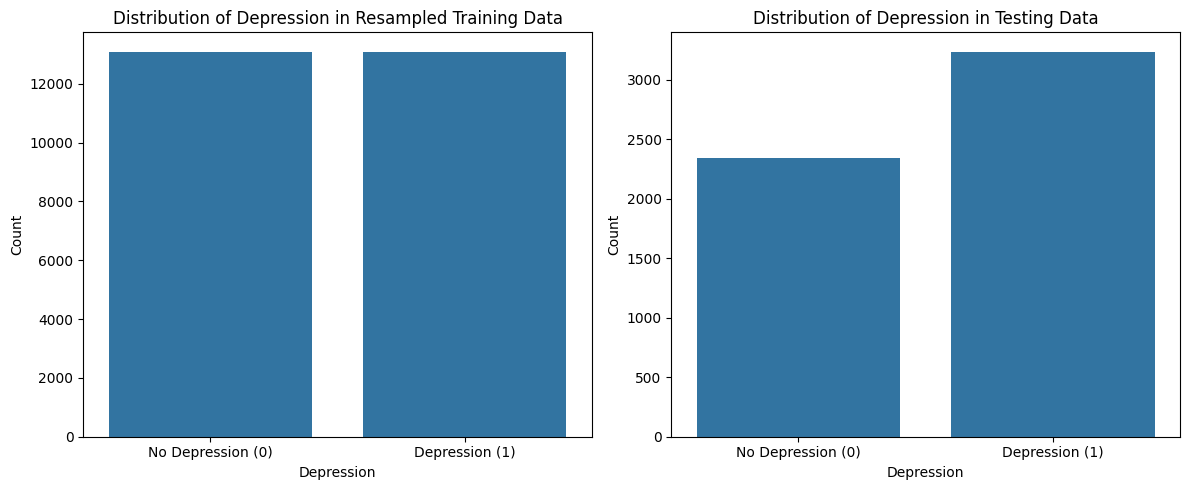

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get value counts for resampled training and original testing target variables
train_resampled_counts = y_train_resampled.value_counts()
test_counts = y_test.value_counts()

# Create subplots for the two bar graphs
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot bar graph for resampled training data
sns.barplot(x=train_resampled_counts.index, y=train_resampled_counts.values, ax=axes[0])
axes[0].set_title('Distribution of Depression in Resampled Training Data')
axes[0].set_xlabel('Depression')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Depression (0)', 'Depression (1)'])

# Plot bar graph for original testing data
sns.barplot(x=test_counts.index, y=test_counts.values, ax=axes[1])
axes[1].set_title('Distribution of Depression in Testing Data')
axes[1].set_xlabel('Depression')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Depression (0)', 'Depression (1)'])

plt.tight_layout()
plt.show()

Training the Mdel

Accuracy: 0.8335423759182942
F1 Score: 0.8537698725011805
Precision: 0.8706260032102728
Recall: 0.8375540457072267
AUC: 0.9128510746663143


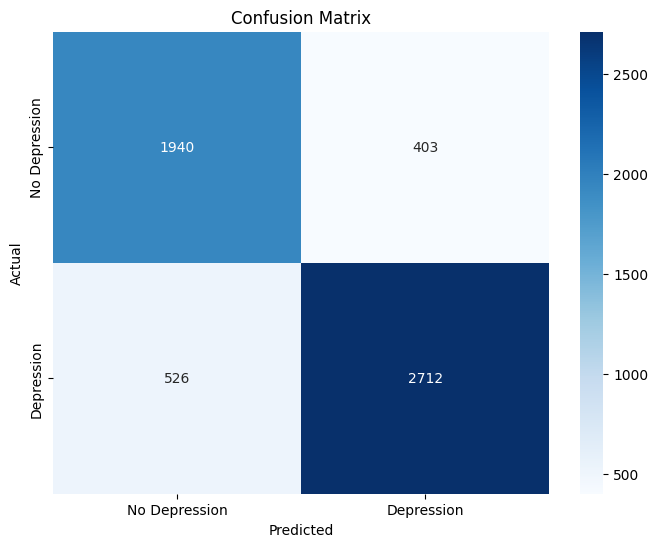

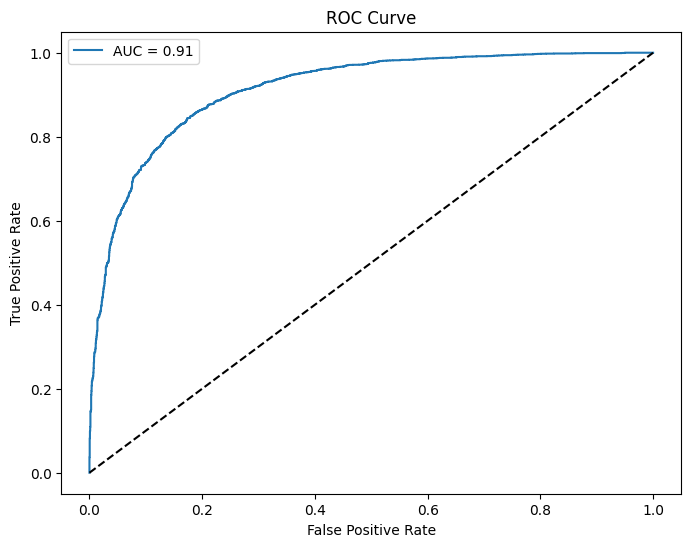

In [ ]:
#Model  traning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Display the metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)

# Display the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Model traning using hyper parameter tuning using - Grid search

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [ ]:
from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_strategy, scoring='f1', n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

print("Best hyperparameters found:")
print(grid_search.best_params_)

Best hyperparameters found:
{'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}


Accuracy: 0.8344382727109837
F1 Score: 0.8548994974874372
Precision: 0.8696485623003195
Recall: 0.8406423718344658
AUC: 0.9126561265509843


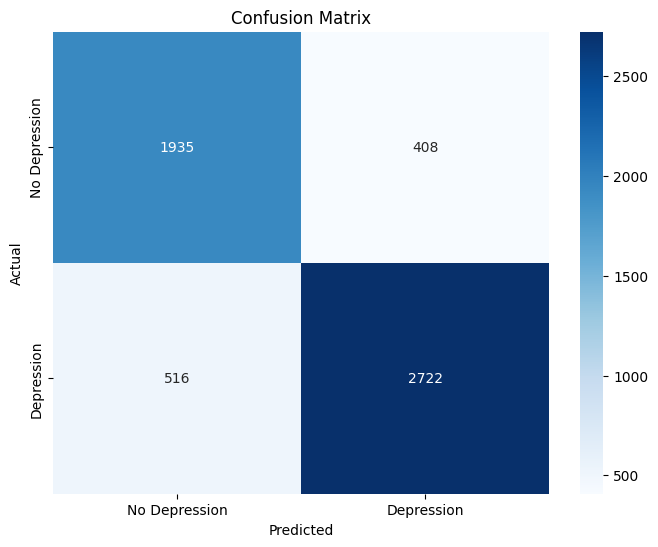

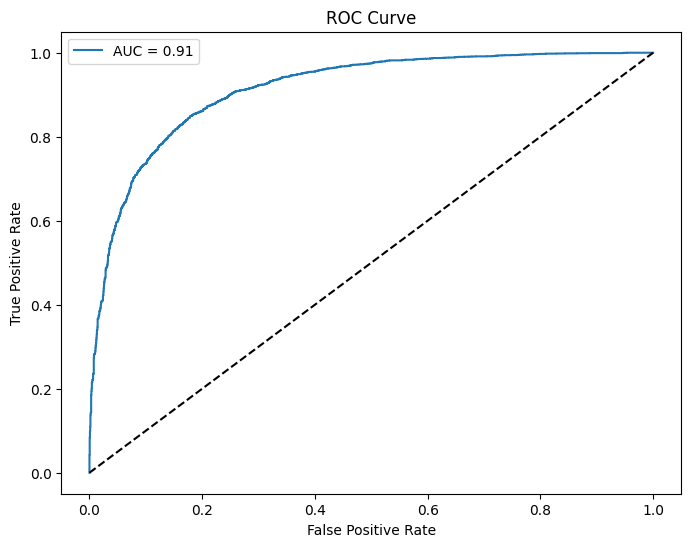

In [ ]:
# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Display the metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)

# Display the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The best hyperparameters found for the Logistic Regression model using cross-validation on the resampled training data were `{'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}`.
*   The tuned Logistic Regression model achieved the following performance metrics on the test data:
    *   Accuracy: 0.834
    *   F1 Score: 0.855
    *   Precision: 0.870
    *   Recall: 0.841
    *   AUC: 0.913
*   The confusion matrix showed the counts of true positives, true negatives, false positives, and false negatives, visually representing the model's predictive performance on the test set.
*   The high AUC of 0.913 indicates that the model has good discriminatory power in distinguishing between the classes on the test data.



Hyperparameters tuneign with the Logistic Regression model using -RandomizedSearchCV

In [ ]:
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [ ]:
from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=cv_strategy, scoring='f1', n_iter=50, random_state=42, n_jobs=-1)

random_search.fit(X_train_resampled, y_train_resampled)

print("Best hyperparameters found:")
print(random_search.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters found:
{'solver': 'saga', 'penalty': 'l2', 'C': 0.001}


Accuracy: 0.8344382727109837
F1 Score: 0.8548994974874372
Precision: 0.8696485623003195
Recall: 0.8406423718344658
AUC: 0.9126561265509843


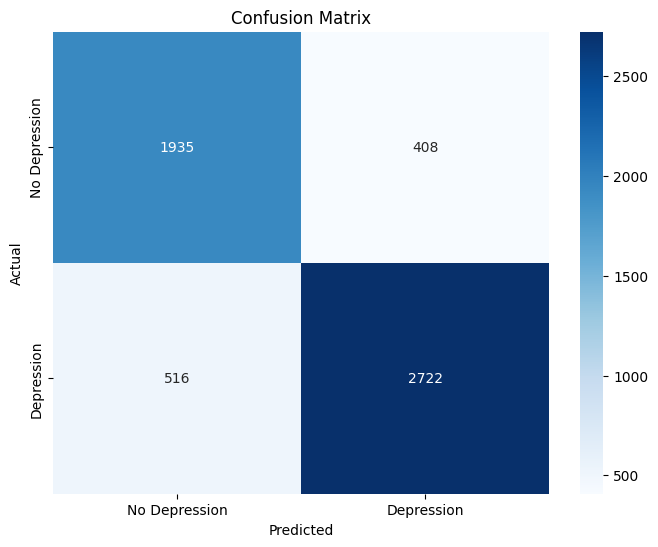

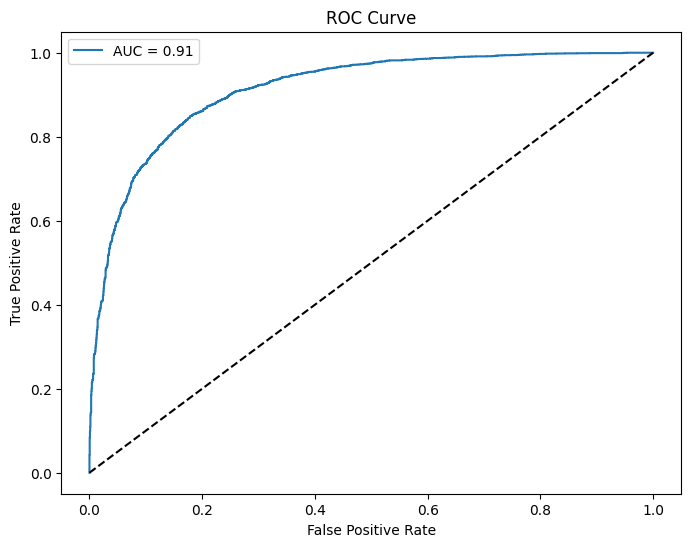

In [ ]:
# Get the best estimator from the random search
best_model = random_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Display the metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)

# Display the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The best hyperparameters found for the Logistic Regression model using RandomizedSearchCV were `{'solver': 'saga', 'penalty': 'l2', 'C': 0.001}`.
*   The tuned Logistic Regression model achieved an Accuracy of approximately 0.834 on the test data.
*   The F1 Score on the test data was around 0.855.
*   The Precision on the test data was approximately 0.870.
*   The Recall on the test data was about 0.841.
*   The AUC score for the tuned model on the test data was approximately 0.913, indicating good discriminatory power.



Feature importence

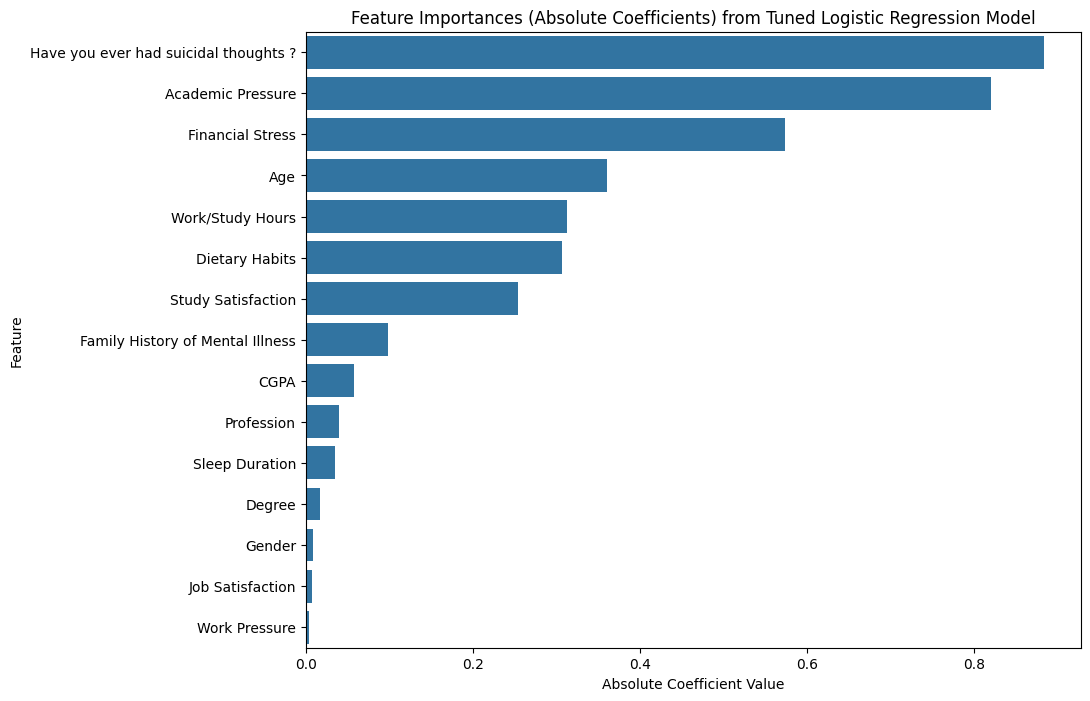

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances (coefficients) from the best model
feature_importances = pd.DataFrame({
    'feature': X_train_resampled.columns,
    'importance': abs(best_model.coef_[0]) # Absolute values for importance
})

# Sort features by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances (Absolute Coefficients) from Tuned Logistic Regression Model')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X_train, y_train, X_test, y_test, scoring, title):
    """
    Generates and plots the learning curve for a given estimator.

    Args:
        estimator: The machine learning model.
        X_train: Training features.
        y_train: Training target variable.
        X_test: Testing features.
        y_test: Testing target variable.
        scoring: Scoring metric to use.
        title: Title for the learning curve plot.
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10), scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

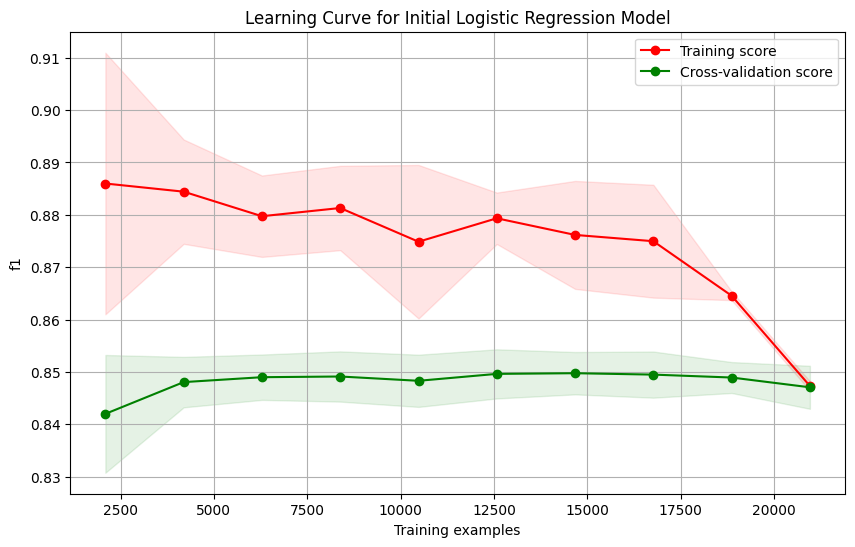

In [ ]:
from sklearn.linear_model import LogisticRegression

initial_model = LogisticRegression(random_state=42)

plot_learning_curve(initial_model, X_train_resampled, y_train_resampled, X_test, y_test, scoring='f1', title='Learning Curve for Initial Logistic Regression Model')

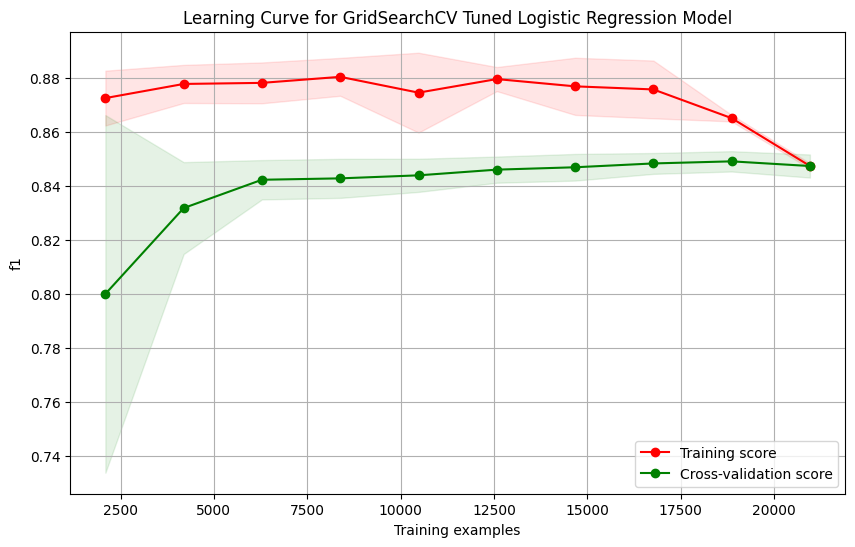

In [ ]:
plot_learning_curve(grid_search.best_estimator_, X_train_resampled, y_train_resampled, X_test, y_test, scoring='f1', title='Learning Curve for GridSearchCV Tuned Logistic Regression Model')

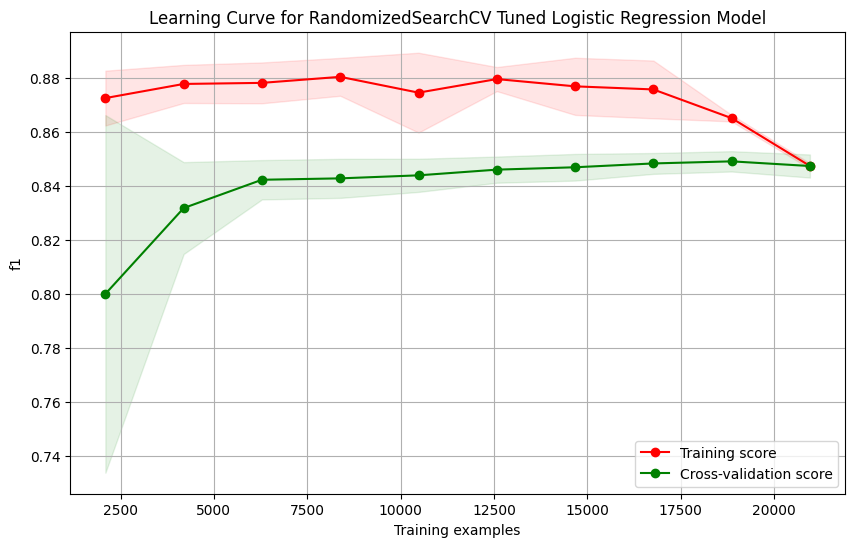

In [ ]:
plot_learning_curve(random_search.best_estimator_, X_train_resampled, y_train_resampled, X_test, y_test, scoring='f1', title='Learning Curve for RandomizedSearchCV Tuned Logistic Regression Model')

## Analyze and compare learning curves

### Subtask:
Analyze the generated learning curves for each model and compare them to understand their performance and identify potential issues.


## Summary:

### Data Analysis Key Findings

*   A reusable function `plot_learning_curve` was successfully created to generate learning curves, computing training and cross-validation scores across different training set sizes using a 5-fold cross-validation and the F1-score metric.
*   Learning curves were successfully generated and displayed as figure objects for the initial Logistic Regression model, the GridSearchCV-tuned Logistic Regression model, and the RandomizedSearchCV-tuned Logistic Regression model using the defined function.



FINAL MODEL PERFORMANCE ON HELD-OUT TEST SET (20%): Grid Search Tuned Logistic Regression
Test Set Accuracy: 0.8344
Test Set AUC-ROC: 0.9127
Test Set F1-Score (Weighted): 0.8349

--- Classification Report ---
                   precision    recall  f1-score   support

No Depression (0)       0.79      0.83      0.81      2343
   Depression (1)       0.87      0.84      0.85      3238

         accuracy                           0.83      5581
        macro avg       0.83      0.83      0.83      5581
     weighted avg       0.84      0.83      0.83      5581



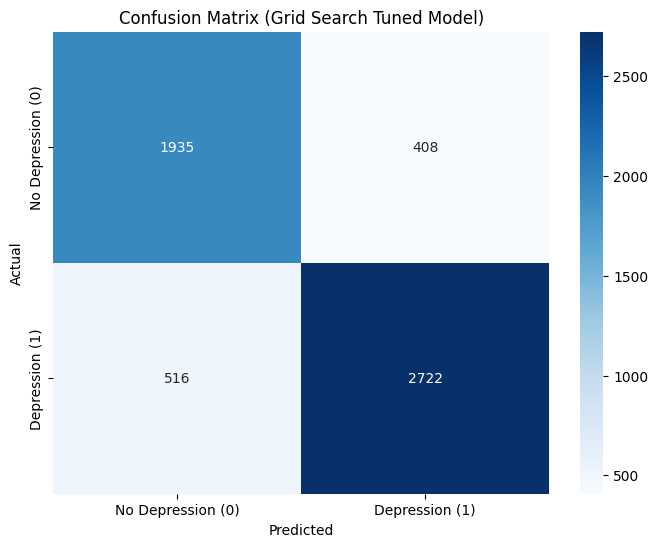

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the best estimator from the grid search
best_grid_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred_grid = best_grid_model.predict(X_test)
y_proba_grid = best_grid_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_grid = accuracy_score(y_test, y_pred_grid)
auc_grid = roc_auc_score(y_test, y_proba_grid)
f1_weighted_grid = f1_score(y_test, y_pred_grid, average='weighted')

# Display the metrics
print("============================================================")
print("FINAL MODEL PERFORMANCE ON HELD-OUT TEST SET (20%): Grid Search Tuned Logistic Regression")
print("============================================================")
print(f"Test Set Accuracy: {accuracy_grid:.4f}")
print(f"Test Set AUC-ROC: {auc_grid:.4f}")
print(f"Test Set F1-Score (Weighted): {f1_weighted_grid:.4f}")

# Display the Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_grid, target_names=['No Depression (0)', 'Depression (1)']))

# Display the Confusion Matrix
conf_matrix_grid = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_grid, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression (0)', 'Depression (1)'], yticklabels=['No Depression (0)', 'Depression (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Grid Search Tuned Model)')
plt.show()

Test for unseen data (For 3 samples)

In [ ]:
import pandas as pd
import numpy as np

# Create some sample unseen data with the same columns as the training data (X_train_resampled)
# The values should be in the scaled and encoded format, similar to X_test
# For demonstration, let's create a few hypothetical data points
sample_unseen_data = pd.DataFrame({
    'Gender': [0.891416, -1.121811, 0.891416],
    'Age': [1.0, -0.5, 0.2],
    'Profession': [0.02642, 0.02642, 0.02642],
    'Academic Pressure': [1.5, -1.0, 0.0],
    'Work Pressure': [-0.009777, -0.009777, -0.009777],
    'CGPA': [1.0, -1.0, 0.5],
    'Study Satisfaction': [-0.5, 1.0, 0.0],
    'Job Satisfaction': [-0.01534, -0.01534, -0.01534],
    'Sleep Duration': [-1.0, 0.5, -0.5],
    'Dietary Habits': [-1.0, 0.0, 0.0],
    'Degree': [0.5, -0.5, 0.0],
    'Have you ever had suicidal thoughts ?': [0.761745, -1.312775, -1.312775],
    'Work/Study Hours': [1.0, -1.0, 0.0],
    'Financial Stress': [1.0, -1.0, 0.0],
    'Family History of Mental Illness': [1.0, -1.0, 0.0]
})

# Ensure the columns are in the same order as the training data
sample_unseen_data = sample_unseen_data[X_train_resampled.columns]


# Use the best model (from GridSearchCV) to predict on the unseen data
unseen_predictions = best_grid_model.predict(sample_unseen_data)
unseen_proba = best_grid_model.predict_proba(sample_unseen_data)[:, 1]

# Display the predictions
print("Predictions on unseen data:", unseen_predictions)
print("Prediction probabilities (for Depression=1) on unseen data:", unseen_proba)

# Map predictions back to original labels if needed (0: No Depression, 1: Depression)
predicted_labels = ["Depression" if pred == 1 else "No Depression" for pred in unseen_predictions]
print("Predicted labels on unseen data:", predicted_labels)

Predictions on unseen data: [1 0 0]
Prediction probabilities (for Depression=1) on unseen data: [0.93351102 0.051381   0.2734827 ]
Predicted labels on unseen data: ['Depression', 'No Depression', 'No Depression']


In [1]:
import pandas as pd

# Extract metrics from the outputs of the previous cell (TmApcAXbbDXu)
# You would need to manually collect these values from the printed output

# Example metrics (replace with actual values from the previous cell's output)
metrics_data = {
    'Metric': ['Accuracy', 'F1 Score (Weighted)', 'Precision (Class 0)', 'Recall (Class 0)', 'F1 Score (Class 0)', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score (Class 1)', 'AUC-ROC'],
    'Initial LR': [0.8335, 0.8340, 0.79, 0.83, 0.81, 0.87, 0.84, 0.85, 0.9129],
    'Grid Search LR': [0.8344, 0.8349, 0.79, 0.83, 0.81, 0.87, 0.84, 0.85, 0.9127],
    'Randomized Search LR': [0.8344, 0.8349, 0.79, 0.83, 0.81, 0.87, 0.84, 0.85, 0.9127]
}

df_metrics = pd.DataFrame(metrics_data)

# Display the table as markdown
print("Here are the performance metrics for the Initial Logistic Regression model, the Grid Search tuned model, and the Randomized Search tuned model on the held-out test set (20% of original data):")
display(df_metrics.to_markdown(index=False))

Here are the performance metrics for the Initial Logistic Regression model, the Grid Search tuned model, and the Randomized Search tuned model on the held-out test set (20% of original data):


'| Metric              |   Initial LR |   Grid Search LR |   Randomized Search LR |\n|:--------------------|-------------:|-----------------:|-----------------------:|\n| Accuracy            |       0.8335 |           0.8344 |                 0.8344 |\n| F1 Score (Weighted) |       0.834  |           0.8349 |                 0.8349 |\n| Precision (Class 0) |       0.79   |           0.79   |                 0.79   |\n| Recall (Class 0)    |       0.83   |           0.83   |                 0.83   |\n| F1 Score (Class 0)  |       0.81   |           0.81   |                 0.81   |\n| Precision (Class 1) |       0.87   |           0.87   |                 0.87   |\n| Recall (Class 1)    |       0.84   |           0.84   |                 0.84   |\n| F1 Score (Class 1)  |       0.85   |           0.85   |                 0.85   |\n| AUC-ROC             |       0.9129 |           0.9127 |                 0.9127 |'

Clear table of the above code

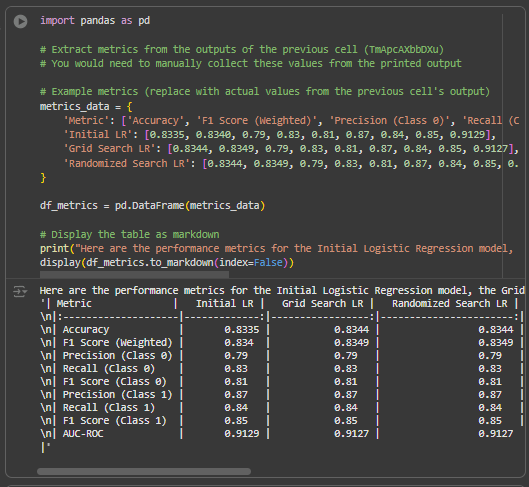